In [2]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from astroquery.gaia import Gaia
from astroquery.simbad import Simbad

import starcolorindexSpT

from pyasassn.client import SkyPatrolClient

import warnings
warnings.filterwarnings('ignore')

In [3]:
from importlib.metadata import version

import lightkurve as lk
print(version('lightkurve'))

from lightkurve import search_targetpixelfile
from lightkurve import search_lightcurve

2.4.0


In [4]:
import matplotlib
import astroquery
import pyasassn

print("pandas" + str(pd.__version__))
print("numpy"  + str(np.__version__))
print("scipy"  + str(sp.__version__))

print("matplotlib" + str(matplotlib.__version__))

print("astroquery" + str(astroquery.__version__))

print("lightkurve" + str(lk.__version__))

print("\n")
!python --version

print("\n")
!jupyter --version

pandas1.1.5
numpy1.24.2
scipy1.9.3
matplotlib3.2.2
astroquery0.4.7.dev8479
lightkurve2.4.0


Python 3.8.5


Selected Jupyter core packages...
IPython          : 8.11.0
ipykernel        : 6.21.3
ipywidgets       : 8.0.4
jupyter_client   : 8.0.3
jupyter_core     : 5.2.0
jupyter_server   : 2.5.0
jupyterlab       : not installed
nbclient         : 0.7.2
nbconvert        : 7.2.10
nbformat         : 5.7.3
notebook         : 6.5.3
qtconsole        : not installed
traitlets        : 5.9.0


In [1]:
import webbrowser

webbrowser.open('https://www.zooniverse.org/projects/tharinduj/citizen-asas-sn/about/research')

webbrowser.open('https://drive.google.com/drive/folders/1gxcIokRsw1eyPmbPZ0-C8blfRGItSOAu')

webbrowser.open('https://asas-sn.osu.edu/variables')

webbrowser.open('https://www.zooniverse.org/projects/tharinduj/citizen-asas-sn/about/research')

webbrowser.open('https://en.wikipedia.org/wiki/List_of_astronomy_acronyms#C')

True

In [5]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [6]:
make_canvas_flag = "Y"

hydrogen_lines_flag = "N"

In [15]:
def make_labels(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

In [16]:
def make_RVS_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin ], rotation=-90, color='red')
    plt.annotate('Pa14 8600', xy=[8600, yRangeMin - 0.3 ], rotation=-90, color='red')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin ],  rotation=-90, color='red')

In [17]:
# Plotter ==============================================
def make_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200])
    
    xLabels = (3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('CN 3839', xy=[3839,   yRangeMin + 0.6],  rotation=-90)
    plt.annotate('H-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('He I 4471.7', xy=[4472, yRangeMin + .20],  rotation=-90, color='orange')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('Mg I 5175', xy=[5175, yRangeMin + .20],  rotation=-90)
    plt.annotate('Fe I 5270', xy=[5270, yRangeMin +  .20],  rotation=-90)
    plt.annotate('He II 5411', xy=[5411, yRangeMin +  .20],  rotation=-90, color='orange')
    plt.annotate('N II 5755', xy=[5755, yRangeMin +  .20],  rotation=-90)
    plt.annotate('D1 Na I 5895', xy=[5895, yRangeMin +  .20],  rotation=-90, color='blue')
    plt.annotate('OI 6302', xy=[6302, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('OI 6365.5', xy=[6365, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('CN 6890', xy=[6890, yRangeMin +  .20],  rotation=-90)
    plt.annotate('Ar III 7135', xy=[7135, yRangeMin +  .20],  rotation=-90)
    plt.annotate('O I 7775', xy=[7775, yRangeMin +  .20], rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin +  .35],  rotation=-90, color='blue')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin +  .30], rotation=-90, color='blue')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin +  .30],  rotation=-90, color='blue')


def Hydrogen_lines(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000])
    
    xLabels = (3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('H12 3750', xy=[3750, yRangeMin +  .50],  rotation=-90, color='red')
    plt.annotate('H11 3771', xy=[3771, yRangeMin -  .35],  rotation=-90, color='red')
    plt.annotate('H10 3798', xy=[3798, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H9 3835', xy=[3835, yRangeMin -  .10],  rotation=-90, color='red')

    plt.annotate('H8-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')

In [18]:
def make_RVS_canvas1(xlabel = '', ylabel = '', fontsize = 12):     ### 8460 - 8580
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8470', xy=[8470, yRangeMin ],  rotation=-90, color='green')
    plt.annotate('Mg I 8476', xy=[8476, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8483', xy=[8483, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8502', xy=[8502, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ce II 8514', xy=[8514, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8516', xy=[8516, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8520.6', xy=[8520.6, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Zr II 8527', xy=[8527, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8529', xy=[8529, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8538', xy=[8538, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8546', xy=[8546, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Cr I 8551', xy=[8551, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8559', xy=[8559, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Ti I 8572', xy=[8572, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8574', xy=[8574, yRangeMin - 0.3],  rotation=-90, color='green')

In [19]:
def make_RVS_canvas2(xlabel = '', ylabel = '', fontsize = 12):    ### 8580 - 8700
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8584', xy=[8584, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe II 8588', xy=[8588, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Nd II 8594', xy=[8594, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8624', xy=[8624, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('N I 8631',  xy=[8631, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ca I 8636',  xy=[8636, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ni I 8639',  xy=[8639, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Cr I 8645', xy=[8645, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8662', xy=[8662, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8666', xy=[8666, yRangeMin],  rotation=-90, color='red')
    plt.annotate('S I 8672',  xy=[8672, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8677', xy=[8677, yRangeMin],  rotation=-90, color='green')
    plt.annotate('N I 8685',  xy=[8685, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Si I 8688', xy=[8688, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8691', xy=[8691, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8694', xy=[8694, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('S I 8697',  xy=[8697, yRangeMin  - 0.3 ],  rotation=-90, color='red')

In [20]:
def PlotTarget4(target, i, targetstring, freqmin, freqmax):
    import matplotlib.pyplot as plt

    import astropy.units as u

    from lightkurve import search_targetpixelfile
    

    plt.rcParams.update({'figure.max_open_warning': 0})
    


    lc = lk.search_lightcurve(target)[i].download();

    #lc = lc0.remove_nans().normalize().remove_outliers()
    #lc = lc0.flatten()
    #lc = lc0.remove_outliers()
    #lc = lc0.remove_outliers(sigma=3)


    if plot_pixelfile == 'Y':
        pixelfile = search_targetpixelfile(target)[i].download()
        pixelfile.plot(frame=1);
        pixel_lc = pixelfile.to_lightcurve(aperture_mask='all')
        pixel_lc.plot()
        sText = "\nPixelfile Lightcurve Plot"
        plt.title(str(target) + " (" + str(i) + ")"  + sText);


    if plot_lightcurve  == "Y":
        #plt.figure(figsize=(13, 10))
        lc.plot()
        #lc.plot(label='Lightcurve Plot2')
        sText = "\nLightcurve Plot"
        plt.title(str(target) + " (" + str(i) + ")"  + sText);

        if plot_PDC_AP_Flux == 'Y':
            ax = lc.plot(column='pdcsap_flux', label='PDCSAP Flux', normalize=True)
            lc.plot(column='sap_flux', label='SAP Flux', normalize=True, ax=ax);
            plt.title(str(target) + " (" + str(i) + ")"  + "\nCompare the PDCSAP and the SAP flux");

        #ax = lc.plot()
        #ax.set_title("PDCSAP light curve of " + str(target));
    
    #period = np.linspace(1, 20, 10000)
    period = np.linspace(freqmin, freqmax, 10000)
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    #bls = lc.normalize().to_periodogram(method='bls', period=period, frequency_factor=500);
    
    period_array = bls.period
    period_rounded = np.round(period_array, 1)
    power_array = bls.power

    # Save the highest peak as the planet candidate
    #index = np.argmax(power_array.power)
    #bls_period = period_array.period[index]


    df_dict = {
        'Period': period_rounded,
        'Power': power_array
        }
    df = pd.DataFrame(df_dict)
    df = df.sort_values(by=['Power'], ascending=False)
    df = df.drop_duplicates(subset=['Period'], keep='first')
    #print(df[0:10])


    planet_period = bls.period_at_max_power
    planet_t0 = bls.transit_time_at_max_power
    planet_dur = bls.duration_at_max_power

    if plot_period      == "Y":
        #plt.figure(figsize=(13, 10))
        #print("Period Array: " + str(period_array))
        bls.plot()
        #plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:  " + str(planet_period));
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:   + {0:.4f} ".format(planet_period)+ "\nlc = lk.search_lightcurve(target)[i].download()");
        #plt.axvline(bls_period, color="C1", lw=5, alpha=0.8)
        # + "\nPeriod array: " + str(period_array)  + "\nPower array: " + str(power_array)
        #print(df['Period'][0:10])


    if plot_phase_fold  == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText = "\nPhase-fold the light curve to confirm period and transit time (epoch) \ncorrespond to a transit signal."
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
        plt.show();
        

    if plot_half_phase_fold == "Y":
        ax = lc.fold(period=0.5*planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with half the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    if plot_2phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=2*planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with twice the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    if plot_3phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=3*planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with three times the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    if plot_4phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=4*planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();
        """pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power
        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();"""

    
    if plot_periodogram == "Y":
        pg = lc.to_periodogram(oversample_factor=1)
        pg.plot()
        sText = "\nPlot the periodogram in the same way that we plot the original light curve."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)   + sText)
        plt.show()

        pg.plot(view='period', scale='log')
        sText = "\nLet's plot it in period space, so that we can see what period the oscillation is occurring at."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=pg.period_at_max_power).scatter()
        sText = "\nLet's use the period_at_max_power to fold the light curve"
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter()
        sText = "\nIf the eclipses do not line up, try plotting it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power  
        sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter and by constraining the range of the period value:"
        #sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter."
        lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter()
        #lc.fold(period=pg.period_at_max_power).scatter()
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)  + sText)
        plt.show()

    plt.figure(figsize=(13.5, 1))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axis('off')
    plt.close()

In [21]:
def PlotTarget4B(target, i, targetstring, freqmin, freqmax):
    import matplotlib.pyplot as plt

    import astropy.units as u
    

    plt.rcParams.update({'figure.max_open_warning': 0})
    


    lc0 = lk.search_lightcurve(target)[i].download();

    lc = lc0.remove_nans().normalize().remove_outliers()


    
    #lc = lc0.flatten()
    #lc = lc0.remove_outliers()
    #lc = lc0.remove_outliers(sigma=3)





    if plot_lightcurve  == "Y":
        #plt.figure(figsize=(13, 10))
        lc.plot()
        #lc.plot(label='Lightcurve Plot2')
        sText = "\nLightcurve Plot"
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
       
    
    #period = np.linspace(1, 20, 10000)
    period = np.linspace(freqmin, freqmax, 10000)
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    #bls = lc.normalize().to_periodogram(method='bls', period=period, frequency_factor=500);
    
    period_array = bls.period
    period_rounded = np.round(period_array, 1)
    power_array = bls.power

    # Save the highest peak as the planet candidate
    #index = np.argmax(power_array.power)
    #bls_period = period_array.period[index]


    df_dict = {
        'Period': period_rounded,
        'Power': power_array
        }
    df = pd.DataFrame(df_dict)
    df = df.sort_values(by=['Power'], ascending=False)
    df = df.drop_duplicates(subset=['Period'], keep='first')
    #print(df[0:10])


    planet_period = bls.period_at_max_power
    planet_t0 = bls.transit_time_at_max_power
    planet_dur = bls.duration_at_max_power

    if plot_period      == "Y":
        #plt.figure(figsize=(13, 10))
        #print("Period Array: " + str(period_array))
        bls.plot()
        #plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:  " + str(planet_period));
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:   + {0:.4f} ".format(planet_period) + "\nlc0.remove_nans().normalize().remove_outliers()");
        #plt.axvline(bls_period, color="C1", lw=5, alpha=0.8)
        # + "\nPeriod array: " + str(period_array)  + "\nPower array: " + str(power_array)
        #print(df['Period'][0:10])


    if plot_phase_fold  == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText = "\nPhase-fold the light curve to confirm period and transit time (epoch) \ncorrespond to a transit signal."
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
        plt.show();

    if plot_4phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power
        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    
    if plot_periodogram == "Y":
        pg = lc.to_periodogram(oversample_factor=1)
        pg.plot()
        sText = "\nPlot the periodogram in the same way that we plot the original light curve."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)   + sText)
        plt.show()

        pg.plot(view='period', scale='log')
        sText = "\nLet's plot it in period space, so that we can see what period the oscillation is occurring at."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=pg.period_at_max_power).scatter()
        sText = "\nLet's use the period_at_max_power to fold the light curve"
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter()
        sText = "\nIf the eclipses do not line up, try plotting it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power  
        sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter and by constraining the range of the period value:"
        #sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter."
        lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter()
        #lc.fold(period=pg.period_at_max_power).scatter()
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)  + sText)
        plt.show()

    plt.figure(figsize=(13.5, 1))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axis('off')
    plt.close()

In [22]:
def PlotTarget5(target, i, targetstring, freqmin, freqmax):

    # https://gallery.exoplanet.codes/tutorials/tess/

    import matplotlib.pyplot as plt

    import astropy.units as u

    import numpy as np
    import lightkurve as lk
    
    from astropy.io import fits
    
    plt.rcParams.update({'figure.max_open_warning': 0})
    

    lc_file = lk.search_lightcurve(target)[i].download();

    lc = lc_file.remove_nans().normalize().remove_outliers()

    #lc = lc_file

    time = lc.time.value
    flux = lc.flux
    m = lc.quality == 0
    with fits.open(lc_file.filename) as hdu:
        hdr = hdu[1].header

    texp = hdr["FRAMETIM"] * hdr["NUM_FRM"]
    texp /= 60.0 * 60.0 * 24.0

    ref_time = 0.5 * (np.min(time) + np.max(time))
    x = np.ascontiguousarray(time[m] - ref_time, dtype=np.float64)
    y = np.ascontiguousarray(1e3 * (flux[m] - 1.0), dtype=np.float64)

    """plt.plot(x, y, ".k")
    plt.xlabel("time [days]")
    plt.ylabel("relative flux [ppt]")
    _ = plt.xlim(x.min(), x.max())

    plt.close()"""


    # Transit search

    # Now, let’s use the box least squares periodogram from AstroPy 
    # (Note: you’ll need AstroPy v3.1 or more recent to use this feature) to estimate the period, phase, and depth of the transit.

    from astropy.timeseries import BoxLeastSquares

    #period_grid = np.exp(np.linspace(np.log(1), np.log(15), 50000))
    period_grid = np.linspace(freqmin, freqmax, 50000)

    bls = BoxLeastSquares(x, y)
    bls_power = bls.power(period_grid, 0.1, oversample=20)

    # Save the highest peak as the planet candidate
    index = np.argmax(bls_power.power)
    bls_period = bls_power.period[index]
    bls_t0 = bls_power.transit_time[index]
    bls_depth = bls_power.depth[index]
    transit_mask = bls.transit_mask(x, bls_period, 0.2, bls_t0)



    fig, axes = plt.subplots(2, 1, figsize=(13, 10))



    # Plot the periodogram
    ax = axes[0]
    #ax.axvline(np.log10(bls_period), color="C1", lw=5, alpha=0.8)
    ax.axvline(bls_period, color="C1", lw=5, alpha=0.8)
    #ax.plot(np.log10(bls_power.period), bls_power.power, "k")
    ax.plot(bls_power.period, bls_power.power, "k")
    ax.annotate(
        "period = {0:.4f} d".format(bls_period),
        (0, 1),
        xycoords="axes fraction",
        xytext=(5, -5),
        textcoords="offset points",
        va="top",
        ha="left",
        fontsize=12,
    )
    ax.set_ylabel("bls power")
    ax.set_yticks([])
    #ax.set_xlim(np.log10(period_grid.min()), np.log10(period_grid.max()))
    ax.set_xlim(period_grid.min(), period_grid.max())
    #ax.set_xlabel("log10(period)")
    ax.set_xlabel("Period")
    sText = "\nPlot the periodogram"
    ax.set_title(str(target) + " (" + str(i) + ")"  + sText);
    #plt.axis('off')
    #plt.show()

    # Plot the folded transit
    ax = axes[1]
    x_fold = (x - bls_t0 + 0.5 * bls_period) % bls_period - 0.5 * bls_period
    m = np.abs(x_fold) < 0.4
    ax.plot(x_fold[m], y[m], ".k")
    ax.annotate(
        "Plot the folded transit",
        (0, 1),
        xycoords="axes fraction",
        xytext=(5, -5),
        textcoords="offset points",
        va="top",
        ha="left",
        fontsize=12,
    )
    sText = "\nPlot the folded transit \n Transit Time : " + str(bls_t0)
    #ax.set_title(str(target) + " (" + str(i) + ")"  + sText);
    #plt.axis('off')

    # Overplot the phase binned light curve
    bins = np.linspace(-0.41, 0.41, 32)
    denom, _ = np.histogram(x_fold, bins)
    num, _ = np.histogram(x_fold, bins, weights=y)
    denom[num == 0] = 1.0
    ax.plot(0.5 * (bins[1:] + bins[:-1]), num / denom, color="C1")

    ax.set_xlim(-0.3, 0.3)
    ax.set_ylabel("de-trended flux [ppt]")
    _ = ax.set_xlabel("time since transit")


    plt.figure(figsize=(13.5, 1))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axis('off')
    plt.show()

In [23]:
def Plot_By_PseudoColor(target1, target2, target3, target4, target5, target6, target7, target8, target9, target10,
                s1, s2, s3, s4, s5, s6, s7, s8, s9, s10):
 
    sptype_len_list = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]
    sptype_list = [str(s1), str(s2), str(s3), str(s4), str(s5), str(s6), str(s7), str(s8), str(s9), str(s10)]

    with plt.style.context('dark_background'):
    
        fig, axs = plt.subplots(1,10, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):
            scatter_2D(df2['bp_rp'], df2['AbsoluteMagnitude'], ax=ax, 
                    c=df2['bp_rp'], cmap='RdYlBu',)

            ax.set(xlim=(df2['bp_rp'].min(),df2['bp_rp'].max()), ylim=(15,-10))
            
            ax.set_title(' {}: {} Stars'.format(label, len(df2)), fontsize = 20)
            ax.set_xlabel('Color index $(bp_rp)$', fontsize = 18)
            ax.set_ylabel('M', fontsize = 18)
        #plt.show()

In [24]:
def Plot_By_PseudoColor5(target1, target2, target3, target4, target5, 
                s1, s2, s3, s4, s5, ):
 
    sptype_len_list = [target1, target2, target3, target4, target5]
    sptype_list = [str(s1), str(s2), str(s3), str(s4), str(s5)]

    with plt.style.context('dark_background'):
    
        fig, axs = plt.subplots(1,5, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):
            scatter_2D(df2['bp_rp'], df2['AbsoluteMagnitude'], ax=ax, 
                    c=df2['bp_rp'], cmap='RdYlBu',)

            ax.set(xlim=(df2['bp_rp'].min(),df2['bp_rp'].max()), ylim=(15,-10))
            
            ax.set_title(' {}: {} Stars'.format(label, len(df2)), fontsize = 20)
            ax.set_xlabel('Color index $(bp_rp)$', fontsize = 18)
            ax.set_ylabel('M', fontsize = 18)
        #plt.show()

In [25]:
def scatter_2D(x, y, fig=None, ax=None, c='k', s=0.1, *args, **kwargs):
    
    if (fig or ax) is None:
        fig, ax = plt.subplots()
    
    plot = ax.scatter(x, y, c=c, s=s, *args, **kwargs)
    
    #axes styling
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(left=True, bottom=True,
                   labelleft=True, labelbottom=True)
    #plt.show()

<img width="800" src="asas_image01.png">

In [26]:
df_asassn_variables = pd.read_csv('asassn_variables_x.csv')

df_asassn_variables.shape[0]

378861

In [27]:
df_asassn_variables['AbsoluteMagnitude'] = df_asassn_variables['phot_g_mean_mag'] + 5*np.log10(df_asassn_variables['parallax']) - 10

In [28]:
df_asassn_variables[['EDR3_source_id', 'ML_classification']].head()

,EDR3_source_id,ML_classification
0,EDR3 2530574359774427904,EA
1,EDR3 2526534822773677696,RRAB
2,EDR3 2428895127914519296,RRAB
3,EDR3 2427103065695770368,EW
4,EDR3 2540208005778921856,RRAB


In [29]:
unique_variable_type = sp.unique(df_asassn_variables['ML_classification'])

In [30]:
for vartype in unique_variable_type:
    v = df_asassn_variables[df_asassn_variables['ML_classification'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

CWA  count: 153
CWB  count: 74
DCEP  count: 434
DCEPS  count: 112
DSCT  count: 2395
EA  count: 21927
EB  count: 13371
EW  count: 47570
HADS  count: 2231
L  count: 13938
M  count: 6650
ROT  count: 53169
RRAB  count: 19035
RRC  count: 6968
RRD  count: 512
RVA  count: 3
SR  count: 189404
VAR  count: 559
YSO  count: 356


In [31]:
df_CWA = df_asassn_variables[df_asassn_variables['ML_classification'] == 'CWA']
df_CWB = df_asassn_variables[df_asassn_variables['ML_classification'] == 'CWB']
df_DCEP = df_asassn_variables[df_asassn_variables['ML_classification'] == 'DCEP']
df_DCEPS = df_asassn_variables[df_asassn_variables['ML_classification'] == 'DCEPS']
df_DSCT = df_asassn_variables[df_asassn_variables['ML_classification'] == 'DSCT']
df_EA = df_asassn_variables[df_asassn_variables['ML_classification'] == 'EA']
df_EB = df_asassn_variables[df_asassn_variables['ML_classification'] == 'EB']
df_EW = df_asassn_variables[df_asassn_variables['ML_classification'] == 'EW']
df_HADS = df_asassn_variables[df_asassn_variables['ML_classification'] == 'HADS']
df_L = df_asassn_variables[df_asassn_variables['ML_classification'] == 'L']
df_M = df_asassn_variables[df_asassn_variables['ML_classification'] == 'M']
df_ROT = df_asassn_variables[df_asassn_variables['ML_classification'] == 'ROT']
df_RRAB = df_asassn_variables[df_asassn_variables['ML_classification'] == 'RRAB']
df_RRC = df_asassn_variables[df_asassn_variables['ML_classification'] == 'RRC']
df_RRD = df_asassn_variables[df_asassn_variables['ML_classification'] == 'RRD']
df_RVA = df_asassn_variables[df_asassn_variables['ML_classification'] == 'RVA']
df_SR = df_asassn_variables[df_asassn_variables['ML_classification'] == 'SR']
df_VAR = df_asassn_variables[df_asassn_variables['ML_classification'] == 'VAR']
df_YSO = df_asassn_variables[df_asassn_variables['ML_classification'] == 'YSO']


In [24]:
df_asassn_variables.columns.tolist()

['ID',
 'RAJ2000',
 'DEJ2000',
 'l',
 'b',
 'ML_classification',
 'ML_probability',
 'Mean_gmag',
 'Amplitude',
 'Period',
 'EpochHJD',
 'LKSL_statistic',
 'ASASSN_Discovery',
 'EDR3_source_id',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ruwe',
 'phot_g_mean_mag',
 'e_phot_g_mean_mag',
 'phot_bp_mean_mag',
 'e_phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'e_phot_rp_mean_mag',
 'bp_rp',
 'EDR3_dist',
 'GALEX_ID',
 'FUVmag',
 'e_FUVmag',
 'NUVmag',
 'e_NUVmag',
 'TIC_ID',
 'AllWISE_ID',
 'W1mag',
 'W2mag',
 'W3mag',
 'W4mag',
 'Jmag',
 'Hmag',
 'Kmag',
 'e_W1mag',
 'e_W2mag',
 'e_W3mag',
 'e_W4mag',
 'e_Jmag',
 'e_Hmag',
 'e_Kmag',
 'Reference',
 'AbsoluteMagnitude']

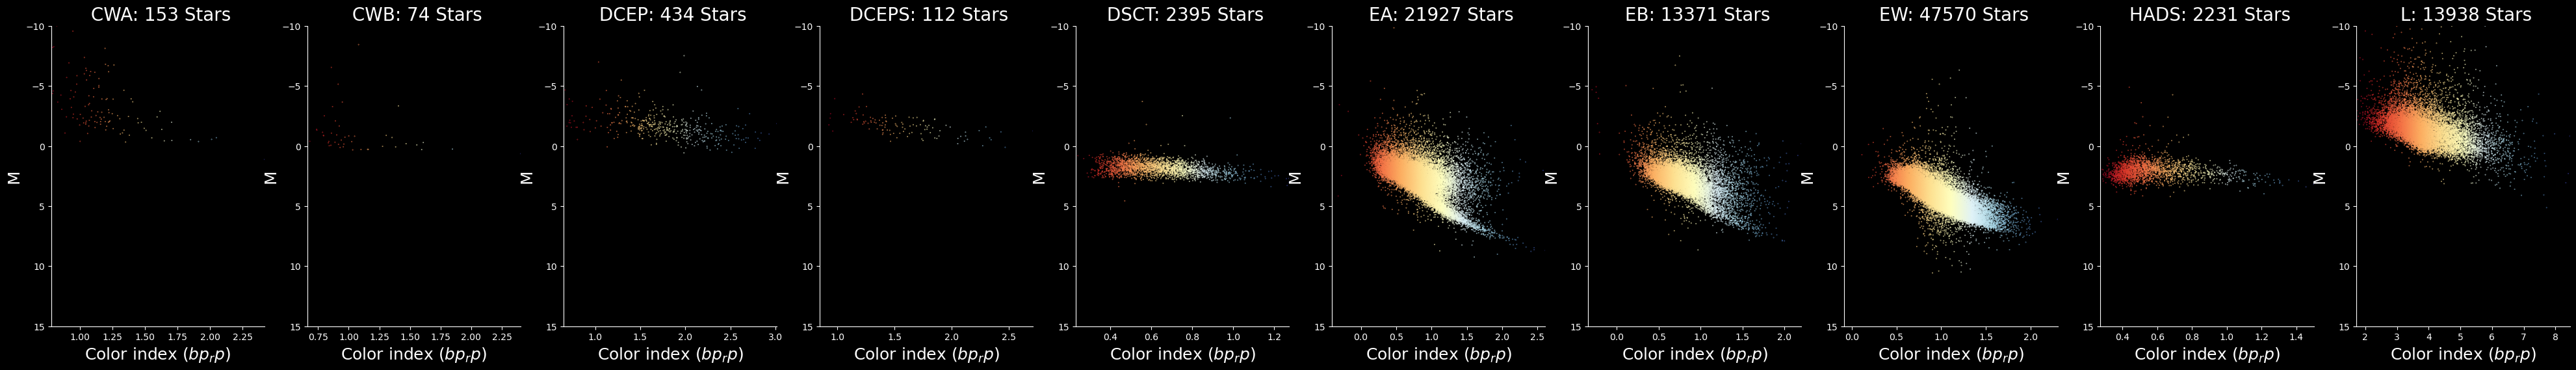

In [25]:
t1 =(df_CWA, df_CWB, df_DCEP, df_DCEPS, df_DSCT, df_EA, df_EB, df_EW, df_HADS, df_L,
         'CWA', 'CWB', 'DCEP', 'DCEPS', 'DSCT', 'EA', 'EB', 'EW', 'HADS', 'L')

Plot_By_PseudoColor(*t1)

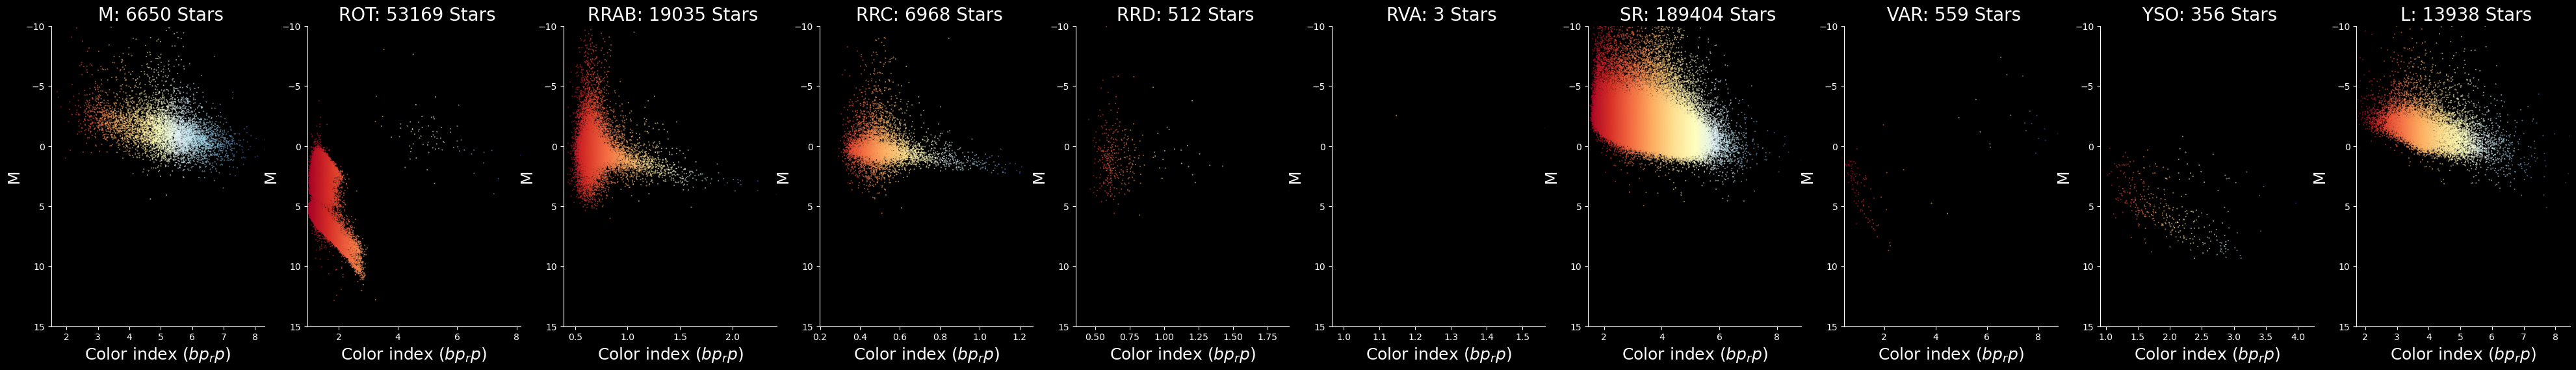

In [26]:
t2 =(df_M, df_ROT, df_RRAB, df_RRC, df_RRD, df_RVA, df_SR, df_VAR, df_YSO, df_L,
         'M', 'ROT', 'RRAB', 'RRC', 'RRD', 'RVA', 'SR', 'VAR', 'YSO', 'L')

Plot_By_PseudoColor(*t2)

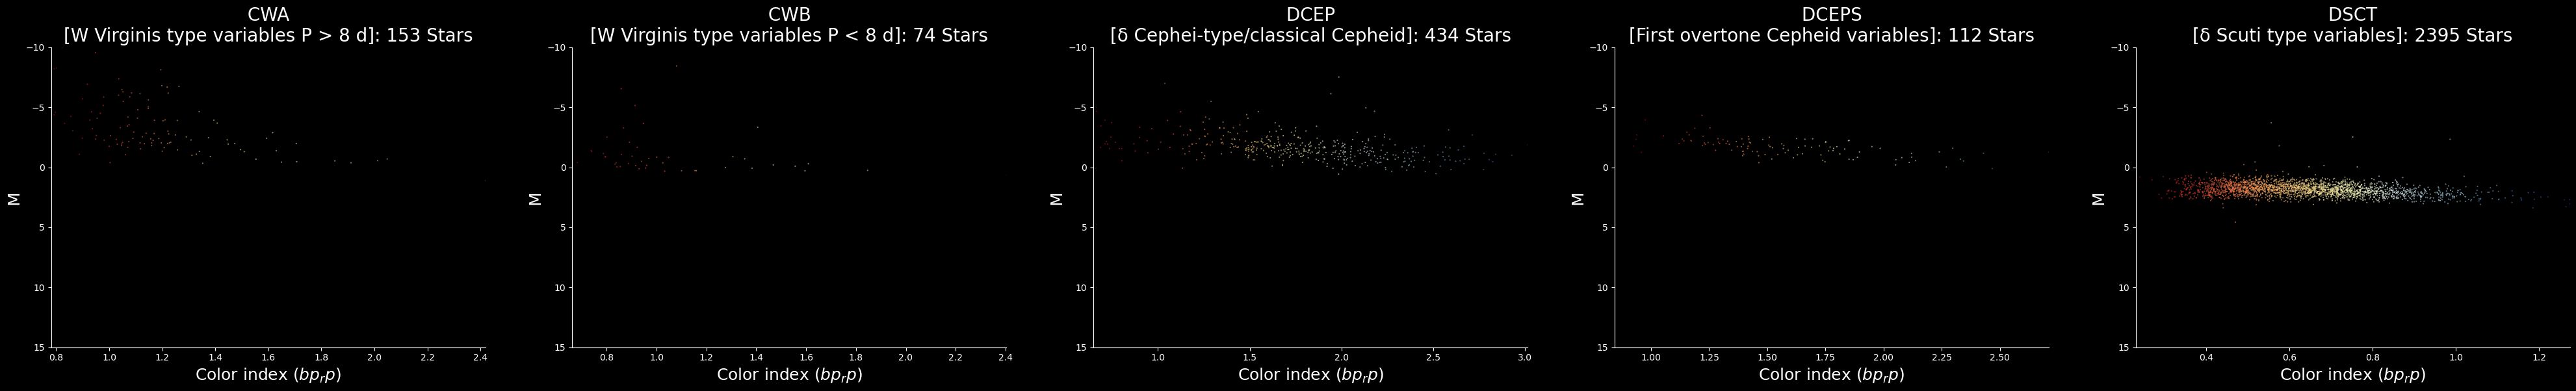

In [27]:
t3 =(df_CWA, df_CWB, df_DCEP, df_DCEPS, df_DSCT, 
         'CWA \n[W Virginis type variables P > 8 d]', 'CWB \n[W Virginis type variables P < 8 d]', 'DCEP \n[δ Cephei-type/classical Cepheid]', 'DCEPS \n[First overtone Cepheid variables]', 'DSCT \n[δ Scuti type variables]')

Plot_By_PseudoColor5(*t3)

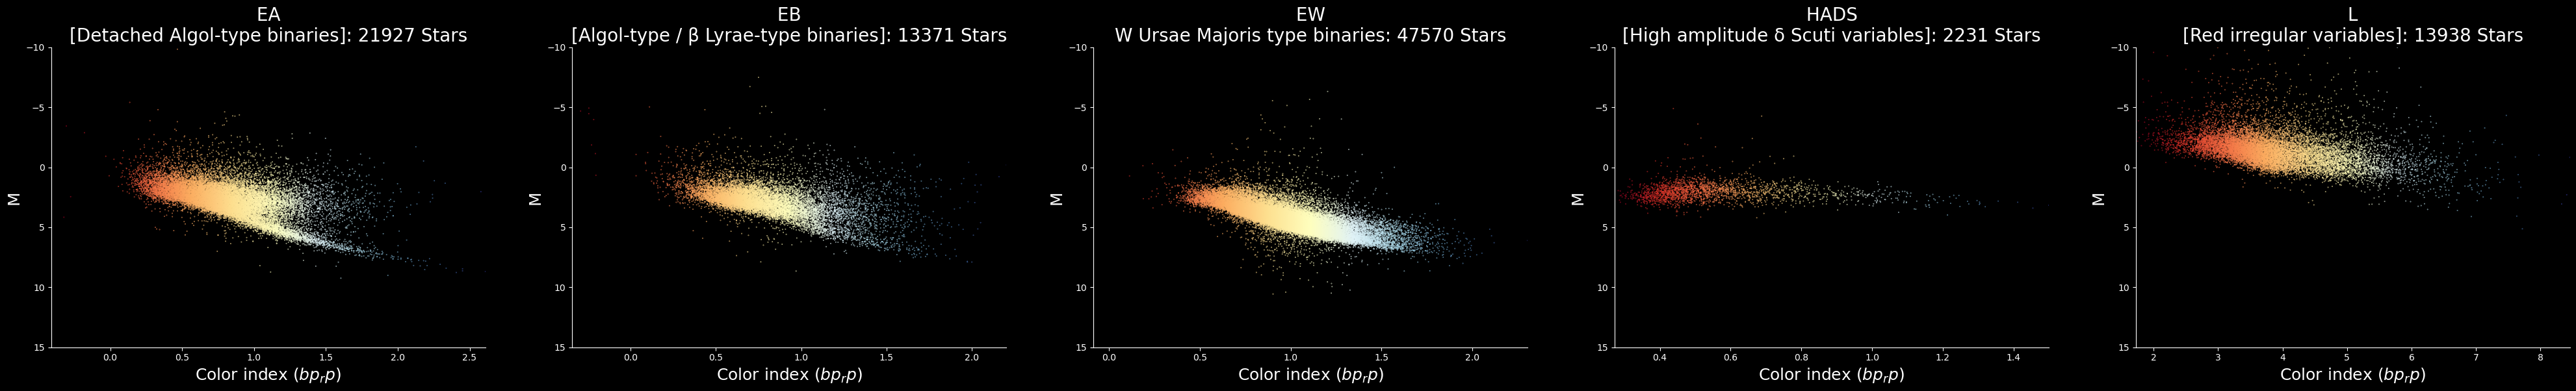

In [28]:
t4 =(df_EA, df_EB, df_EW, df_HADS, df_L,
         'EA \n[Detached Algol-type binaries]', 'EB \n[Algol-type / β Lyrae-type binaries]', 'EW \nW Ursae Majoris type binaries', 'HADS \n[High amplitude δ Scuti variables]', 'L \n[Red irregular variables]')

Plot_By_PseudoColor5(*t4)

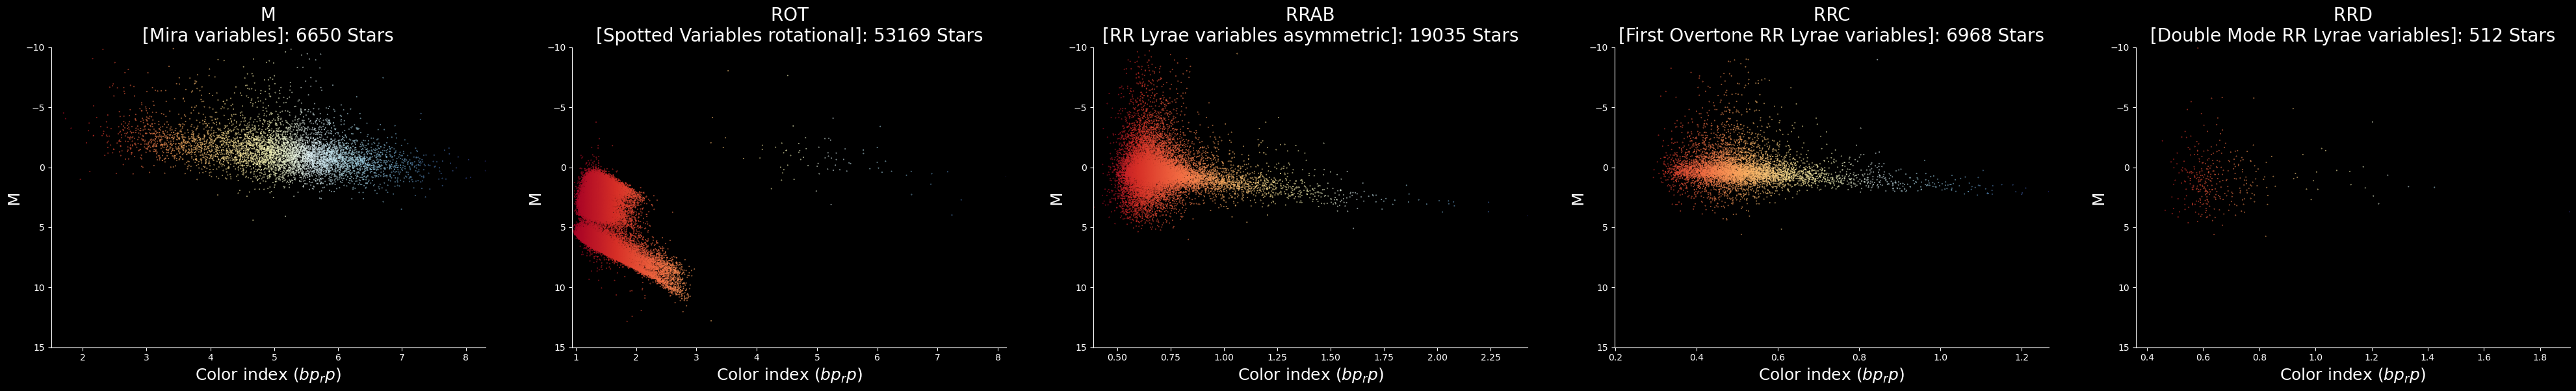

In [29]:
t5 =(df_M, df_ROT, df_RRAB, df_RRC, df_RRD, 
         'M \n[Mira variables]', 'ROT \n[Spotted Variables rotational]', 'RRAB \n[RR Lyrae variables asymmetric]', 'RRC \n[First Overtone RR Lyrae variables]', 'RRD \n[Double Mode RR Lyrae variables]')

Plot_By_PseudoColor5(*t5)

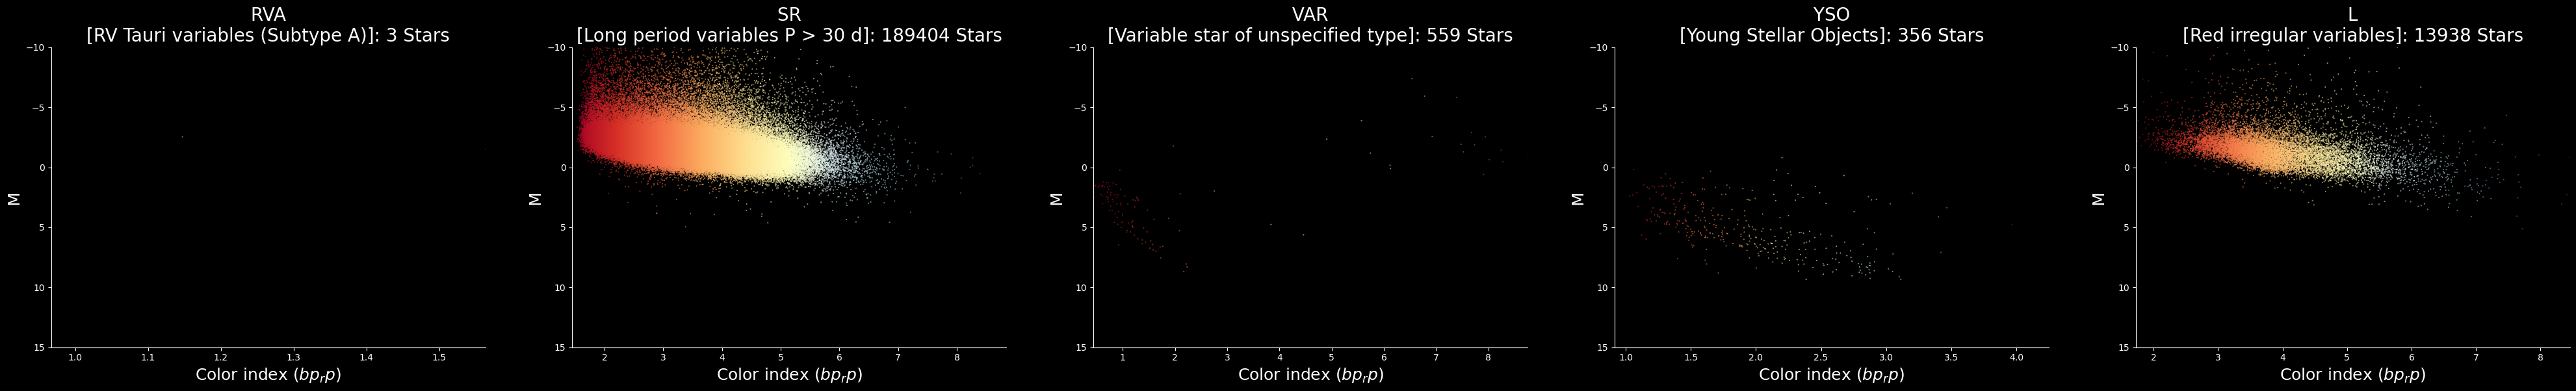

In [30]:
t6 =(df_RVA, df_SR, df_VAR, df_YSO, df_L,
         'RVA \n[RV Tauri variables (Subtype A)]', 'SR \n[Long period variables P > 30 d]', 'VAR \n[Variable star of unspecified type]', 'YSO \n[Young Stellar Objects]', 'L \n[Red irregular variables]')

Plot_By_PseudoColor5(*t6)

In [32]:
#dfx = df_CWA 
#ASASSN_Variable_Type = 'CWA: [W Virginis type variables with P > 8 d]'

#dfx = df_CWB 
#ASASSN_Variable_Type = 'CWB: [W Virginis type variables with P < 8 d (BL Herculis variables)]'

#dfx = df_DCEP
#ASASSN_Variable_Type = 'DCEP: [δ Cephei-type/classical Cepheid variables]'

#dfx = df_DCEPS
#ASASSN_Variable_Type = 'DCEPS: [First overtone Cepheid variables]'

dfx = df_DSCT 
ASASSN_Variable_Type = 'DSCT: [δ Scuti type variables]'

#dfx = df_EA 
#ASASSN_Variable_Type = 'EA: [Detached Algol-type binaries]'

#dfx = df_EB 
#ASASSN_Variable_Type = 'EB: [Algol-type or β Lyrae-type binaries]'

#dfx = df_EW 
#ASASSN_Variable_Type = 'EW: [W Ursae Majoris type binaries]'

#dfx = df_HADS 
#ASASSN_Variable_Type = 'HADS: [High amplitude δ Scuti type variables]'

#dfx = df_L 
#ASASSN_Variable_Type = 'L: [Red irregular variables]'

#dfx = df_M 
#ASASSN_Variable_Type = 'M: [Mira variables]'

#dfx = df_ROT 
#ASASSN_Variable_Type = 'ROT: [Spotted Variables with rotational modulation]'

#dfx = df_RRAB 
#ASASSN_Variable_Type = 'RRAB: [RR Lyrae variables with asymmetric light curves]'

#dfx = df_RRC 
#ASASSN_Variable_Type = 'RRC: [First Overtone RR Lyrae variables]'

#dfx = df_RRD 
#ASASSN_Variable_Type = 'RRD: [Double Mode RR Lyrae variables]'

#dfx = df_RVA 
#ASASSN_Variable_Type = 'RVA: [RV Tauri variables (Subtype A)]'

#dfx = df_SR 
#ASASSN_Variable_Type = 'SR: [Long period variables P > 30 d]'

#dfx = df_VAR 
#ASASSN_Variable_Type = 'VAR: [Variable star of unspecified type]'

#dfx = df_YSO 
#ASASSN_Variable_Type = 'YSO: [Young Stellar Objects]'

dfx[['ID', 'ML_classification', 'EDR3_source_id','Period', 'EDR3_dist', 'parallax', 'TIC_ID']].head(10)

,ID,ML_classification,EDR3_source_id,Period,EDR3_dist,parallax,TIC_ID
1122,ASASSN-V J053555.98-092111.0,DSCT,EDR3 3013681519702199808,0.108595,1662.0,0.5707,TIC 388919955
2079,ASASSN-V J063437.62-004854.3,DSCT,EDR3 3119181313953441920,0.075645,2089.0,0.4327,TIC 37493576
2272,ASASSN-V J064305.93-061803.6,DSCT,EDR3 3100459001758272256,0.093674,1548.0,0.6026,TIC 119552354
2349,ASASSN-V J065840.36-023357.5,DSCT,EDR3 3108922213339445888,0.085367,1392.0,0.6667,TIC 32939881
2570,ASASSN-V J065003.43-002826.0,DSCT,EDR3 3113224361816437376,0.100901,1079.0,0.9007,TIC 281615721
2658,ASASSN-V J065049.95-003943.4,DSCT,EDR3 3113147194144390912,0.072248,1802.0,0.5032,TIC 281812447
2889,ASASSN-V J070201.60-072535.8,DSCT,EDR3 3052447211625591808,0.095175,1764.0,0.5251,TIC 125256798
2979,ASASSN-V J065903.94-054537.7,DSCT,EDR3 3100981750818196736,0.094676,1238.0,0.7732,TIC 33088110
3115,ASASSN-V J070904.05-031942.5,DSCT,EDR3 3107728899620954880,0.125655,3267.0,0.2508,TIC 4834352
3370,ASASSN-V J071434.46-022834.4,DSCT,EDR3 3108264847124243200,0.129858,1440.0,0.6593,TIC 23623140


In [33]:
dfs = dfx.reset_index(drop=True)

In [34]:
ASASSN_list = dfs['ID'][10:20].to_list()     # Change range as needed but keep is reasonable else Gaia may cancel the connection

ASASSN_list

['ASASSN-V J075545.46-052313.7',
 'ASASSN-V J134038.85-015245.4',
 'ASASSN-V J140044.44-050628.9',
 'ASASSN-V J151324.44-012214.5',
 'ASASSN-V J170910.11-005418.2',
 'ASASSN-V J190610.44-061635.4',
 'ASASSN-V J192204.75-073138.6',
 'ASASSN-V J191544.56-093604.7',
 'ASASSN-V J202341.45-020944.2',
 'ASASSN-V J211727.53-004729.9']

In [35]:
for i in range(0, len(ASASSN_list)):
    print("\n")
    print(ASASSN_list[i])
    df_variable = dfx[dfx['ID'] == ASASSN_list[i]]
    target_source_id = df_variable['EDR3_source_id'].values[0]
    source_id_target0 = target_source_id.strip('EDR3')
    source_id_target = source_id_target0.strip(' ')
    
    query = f"SELECT TOP 10 s.*, p.* \
        FROM gaiadr3.gaia_source AS s \
        join gaiadr3.astrophysical_parameters AS p USING (source_id) \
        WHERE s.has_xp_sampled = 'True' \
        AND p.source_id = " + str(source_id_target)

    job     = Gaia.launch_job_async(query)
    job_results = job.get_results()

    target = job_results.to_pandas()

    results = target['source_id'].values.tolist()
    
    if len(results) != 0:
        print("\n")
        print(str(ASASSN_list[i]) + " has XP spectra for Gaia source_id: " + str(results))
    else:
        print(str(ASASSN_list[i]) + " has no XP spectra")
        
print("\nDone!")



ASASSN-V J075545.46-052313.7
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J075545.46-052313.7 has XP spectra for Gaia source_id: [3068170434055585536]


ASASSN-V J134038.85-015245.4
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J134038.85-015245.4 has XP spectra for Gaia source_id: [3661506486523630080]


ASASSN-V J140044.44-050628.9
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J140044.44-050628.9 has XP spectra for Gaia source_id: [3644699081198825600]


ASASSN-V J151324.44-012214.5
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J151324.44-012214.5 has XP spectra for Gaia source_id: [4418198055276116864]


ASASSN-V J170910.11-005418.2
INFO: Query finished. [astroquery.utils.tap.core]


ASASSN-V J170910.11-005418.2 has XP spectra for Gaia source_id: [4380334035913872512]


ASASSN-V J190610.44-061635.4
INFO: Query finished. [astroquery.utils.tap.core]
ASASSN-V J190610.44-061635.4 has no XP spectra


ASASSN-V J192204.75-07313

In [36]:
#
# Copy and paste target ID from above
#

df_variable = dfx[dfx['ID'] == 'ASASSN-V J192204.75-073138.6']

df_variable[['ID', 'ML_classification', 'EDR3_source_id','Period', 'EDR3_dist', 'parallax', 'TIC_ID']]


,ID,ML_classification,EDR3_source_id,Period,EDR3_dist,parallax,TIC_ID
14182,ASASSN-V J192204.75-073138.6,DSCT,EDR3 4207779842157587072,0.081433,1519.0,0.6191,TIC 98698661


In [37]:
target_source_id = df_variable['EDR3_source_id'].values[0]
target_source_id

'EDR3 4207779842157587072'

In [38]:
source_id_target0 = target_source_id.strip('EDR3')
source_id_target = source_id_target0.strip(' ')
source_id_target

'4207779842157587072'

In [39]:
# RETRIEVE A SET OF SOURCES WITH XP SAMPLED SPECTRA OBAFGKM & CSTAR

query = f"SELECT TOP 10 s.*, p.* \
FROM gaiadr3.gaia_source AS s \
join gaiadr3.astrophysical_parameters AS p USING (source_id) \
WHERE s.has_xp_sampled = 'True' \
AND p.source_id = " + str(source_id_target)

job     = Gaia.launch_job_async(query)
job_results = job.get_results()

target = job_results.to_pandas()

results = target['source_id'].values.tolist()
print(results)

if len(results) == 0:
    print("\nNo Matching Gaia XP record found for source_id: " + str(source_id_target) + "\n")
    print("ASAS_SN_Variable_Type: " + str(ASASSN_Variable_Type) + "\n")
    client = SkyPatrolClient()
    gaia_id = int(source_id_target)
    df_asas = client.query_list([gaia_id],
        catalog='stellar_main',id_col='gaia_id')
    asas_sn_id = df_asas['asas_sn_id']

    if asas_sn_id.empty:
        print("No asas_sn_id found")
    else:
        print("asas_sn_id: " + str(asas_sn_id))
        asas_sn_id = int(df_asas['asas_sn_id'])
        lcs = client.query_list([asas_sn_id],
            catalog='master_list',id_col='asas_sn_id',download=True)
        lightcurve = lcs[asas_sn_id]
        #lightcurve.plot()

        """
        Periodigram Utility
        We have included a thin-wrapper for astropy’s lomb scargle periodagram utility. 
        Using the lomb_scargle function we can get the freqency and power spectrum of the light curve. 
        While ‘plot’ is set to True, the function will also produce a plot of the power spectrum
        """;

        # An astropy LombScargle object is also returned as ls

        frequency, power, ls = lightcurve.lomb_scargle(plot=False)

        """
        Finally, we can use the power spectrum to find the period of our target and generate a 
        phase folded lightcurve.
        """;

        # If plot is set we will also get a plot.
        lightcurve.find_period(frequency, power, plot=True)
else:
    print("\nGaia XP match found: " + str(source_id_target))

INFO: Query finished. [astroquery.utils.tap.core]
[4207779842157587072]

Gaia XP match found: 4207779842157587072


In [40]:
target[['source_id', 'spectraltype_esphs', 'classlabel_espels']]

,source_id,spectraltype_esphs,classlabel_espels
0,4207779842157587072,A,


In [41]:
import numpy as np
import scipy as sp
import starcolorindexSpT 

target['SpT2'] = target.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

target['SpT2_dereddened'] = target.apply(lambda row: starcolorindexSpT.subclass[round((row.bp_rp - row.ebpminrp_gspphot), 2)], axis=1)

In [42]:
import numpy as np

conditions = [
    (target['logg_gspphot'].astype(float) > 4.20),
    ((target['logg_gspphot'].astype(float) <= 4.20) & (target['logg_gspphot'].astype(float) > 3.90)),
    ((target['logg_gspphot'].astype(float) <= 3.90) & (target['logg_gspphot'].astype(float) > 3.60)),
    ((target['logg_gspphot'].astype(float) < 2.55) & (target['logg_gspphot'].astype(float) > 2.35)),
    (target['logg_gspphot'].astype(float) <= 3.60),
    (target['logg_gspphot'].isna())
]

values = ['main_sequence', 'turnoff', 'subgiants', 'red_clump', 'red_giants', 'unknown']

target['Star_Type'] = np.select(conditions, values)

In [43]:
cds_portal_flag    = 'N'
simbad_portal_flag = 'N'
sdss_portal_flag   = 'N'
vizier_portal_flag = 'N'

Welcome to ASAS-SN Skypatrol!

Current Deployment Version: 0.6.8 (05 February 2023)
Please upgrade your client if not up to date.


1: 4207779842157587072 has_xp_sampled: True

Ra: 290.519783834326
Dec: -7.527395730043867

Source_Id: 4207779842157587072

ATO J290.5197-07.5274

Simbad star subclass: [""]

BP_RP star subclass: F9
BP_RP dereddened star subclass: Unknown
classlabel_espels: 
Star Type: unknown

ASAS_SN Variable Type: DSCT: [δ Scuti type variables]



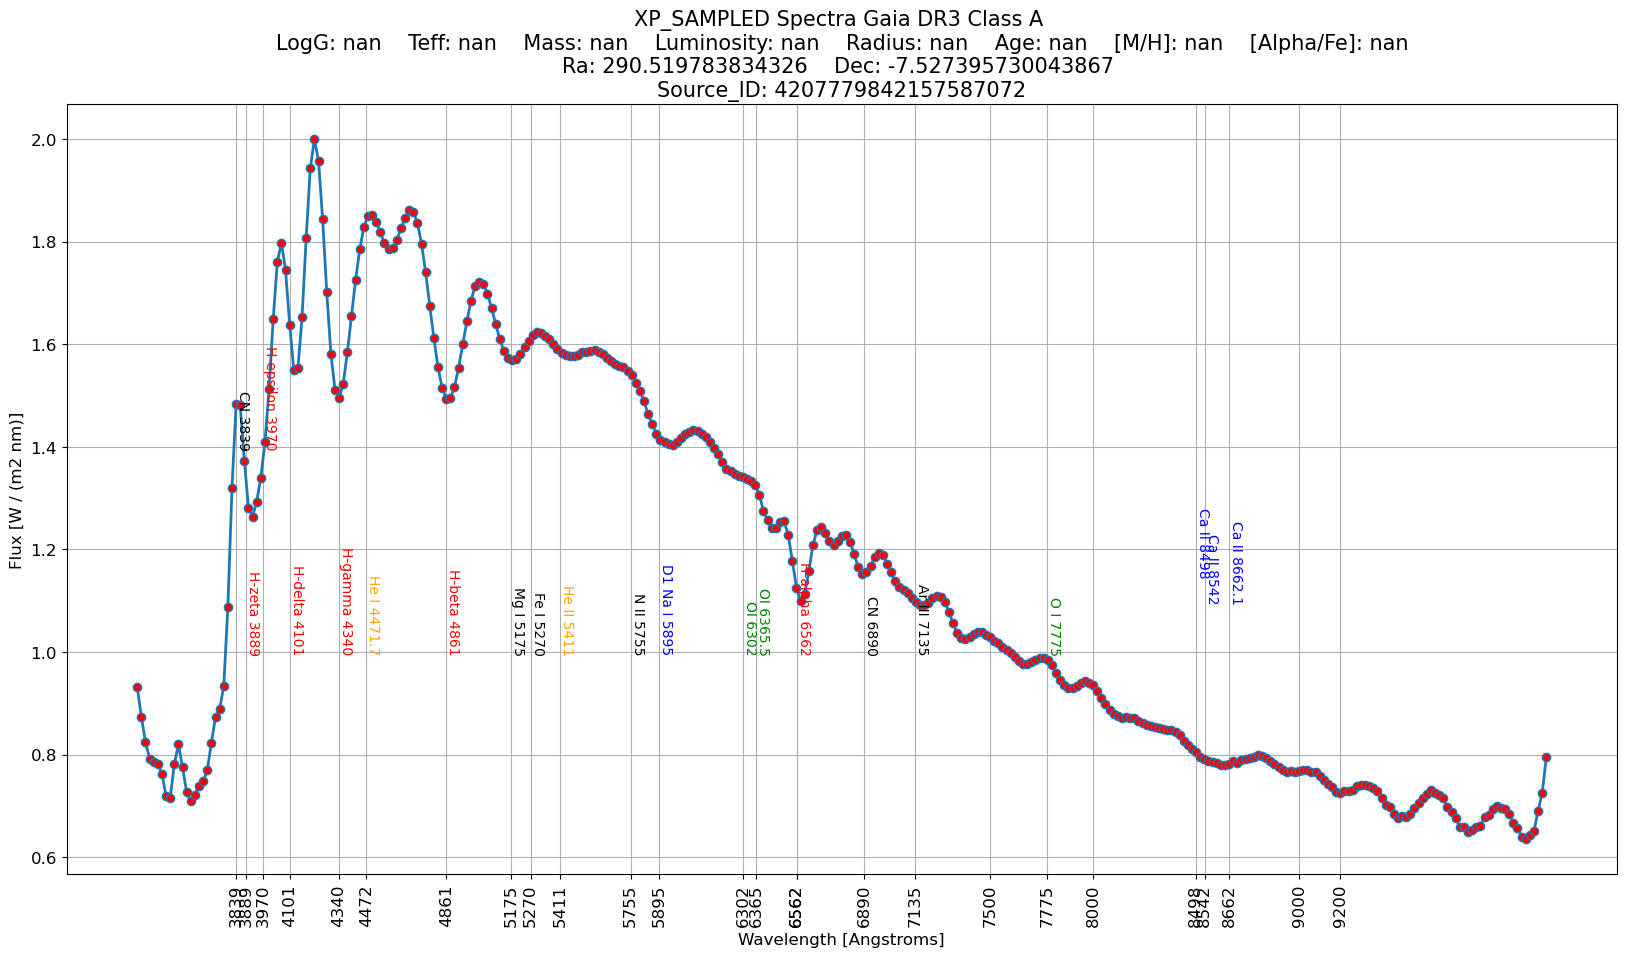

asas_sn_id: 0    309237753564
Name: asas_sn_id, dtype: int64
Pulled 1 of 1


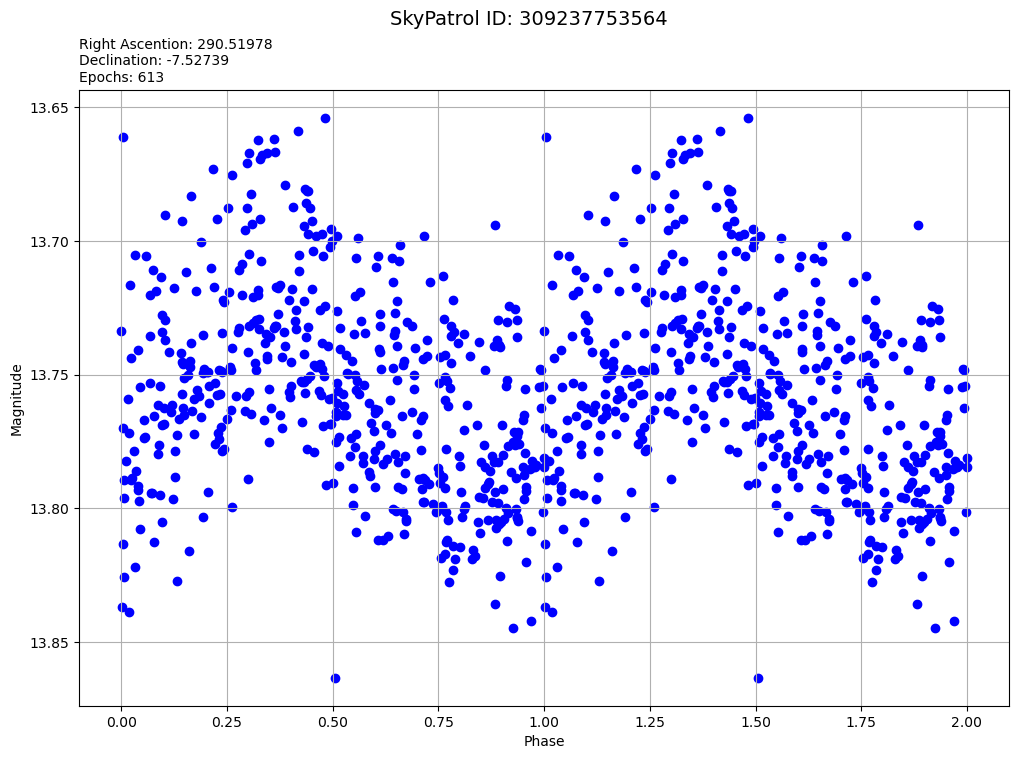


4207779842157587072 has_rvs: False


Done!


In [44]:
from astroquery.gaia import Gaia
from astroquery.simbad import Simbad 

import astropy.coordinates as coord
import astropy.units as u

import pyvo as vo

import matplotlib.pyplot as plt

import webbrowser

from pyasassn.client import SkyPatrolClient
client = SkyPatrolClient()


for idx in range(0, len(results)):
    print("\n1: " + str(results[idx]) + ' has_xp_sampled: ' + str(target['has_xp_sampled'].iloc[idx]))                        # 1st print statement
    if target['has_xp_sampled'].iloc[idx] == True:
        datalink = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_SAMPLED')
        outputs = [datalink[key][0] for key in datalink.keys()]

        #print("2: " + str(results[idx]) + " Number of stars with XP Spectra: " + str(len(outputs)))                         # 2nd print statement
        if outputs is not None:
            #print("3: " + "outputs is not None")                                                                            # 3rd print statement
            if len(outputs) > 0:
                #print("4: " + "len(outputs): " + str(len(outputs)))                                                         # 4th print statement

                # ====================================================================================
                xRa = str(target['ra'].iloc[idx])
                yDec = str(target['dec'].iloc[idx])
                source_id = str(target['source_id'].iloc[idx])

                print("\n" + "Ra: " + str(xRa))                                                                            
                print("Dec: " + str(yDec))  
                print("\n" + "Source_Id: " + str(source_id) + "\n")              

                if cds_portal_flag == 'Y':
                    cds_portal = 'http://cdsportal.u-strasbg.fr/?target=' + str(xRa) + '%20' + str(yDec)
                    webbrowser.open(cds_portal) 

                if simbad_portal_flag == 'Y':
                    simbad_portal = 'http://simbad.cds.unistra.fr/simbad/sim-coo?Coord=' + str(xRa) + '+' + str(yDec) + \
                                '&CooFrame=FK5&CooEpoch=2000&CooEqui=2000&CooDefinedFrames=none&Radius=2&Radius.unit=arcmin&submit=submit+query'
                    webbrowser.open(simbad_portal)  

                if sdss_portal_flag == 'Y':
                    sdss_portal = 'http://skyserver.sdss.org/dr17/VisualTools/quickobj?ra=' + str(xRa) + '&dec=' + str(yDec)
                    webbrowser.open(sdss_portal)           

                if vizier_portal_flag == 'Y':
                    vizier_portal = 'http://vizier.u-strasbg.fr/viz-bin/VizieR-S?Gaia%20EDR3%20' + str(source_id) 
                    webbrowser.open(vizier_portal)                                          

                result_table = Simbad.query_region(coord.SkyCoord(str(xRa) + " " + str(yDec), 
                    unit=(u.deg, u.deg),frame='icrs'))

                #print("5: " + str(result_table))                                                                            # 5th print statement
                if result_table is not None:
                    if len(result_table) > 0:
                        #print("6: " + "Ra: " + str(xRa))                                                                     # 6th print statement
                        #print("7: " + "Dec: " + str(yDec))                                                                   # 7th print statement

                        for i in range(0, len(result_table['MAIN_ID'])):
                            print(result_table['MAIN_ID'][i])

                        target1 = result_table['MAIN_ID'][0]

                        object = Simbad.query_object(target1)

                        tap_service = vo.dal.TAPService("http://simbad.u-strasbg.fr/simbad/sim-tap")

                        tap_sql = "SELECT main_id, sp_type, otype_txt, otype_longname \
                                        FROM basic JOIN ident ON oidref = oid \
                                            JOIN otypedef ON basic.otype = otypedef.otype \
                                        WHERE id = '" + str(target1) + "';"

                        tap_results = tap_service.search(tap_sql)
                        sptype = tap_results['sp_type']
                        txt = str(sptype).split("=")
                        txt = str(txt).replace("['", "")
                        sp_txt = str(txt).replace("']", "")
                        print("\n" + "Simbad star subclass: " + str(sp_txt))


                print("\n" + "BP_RP star subclass: " + str(target['SpT2'].iloc[idx]))
                print("BP_RP dereddened star subclass: " + str(target['SpT2_dereddened'].iloc[idx]))
                print("classlabel_espels: " + str(target['classlabel_espels'].iloc[idx]))
                print("Star Type: " + str(target['Star_Type'].iloc[idx]))
                print("\nASAS_SN Variable Type: " + str(ASASSN_Variable_Type) + '\n' )
                #print("Star Distance [pc]: " + str(int(target['distance_gspphot'].iloc[idx])))
                #print("Star Distance [light years]: " + str(int(target['distance_gspphot'].iloc[idx] * 3.26156)) + "\n")

                # ====================================================================================


                xp      = outputs[0].to_table()                       

                # Add flux-density columns ============================
                xp['flux_jy']         = xp['flux'].to(u.Jansky, equivalencies = u.spectral_density(xp['wavelength'].value * xp['wavelength'].unit))
                xp['flux_mjy']        = xp['flux_jy'].to(u.millijansky)
                xp['flux_mjy'].format = '7.4f'
                
                # =========
                
                #display(xp)

                # =========

                fig       = plt.figure(figsize=[20,10])

                yRangeMax = float(xp['flux'].max())

                plt.plot(xp['wavelength']*10, xp['flux']/yRangeMax * 2, linewidth = 2, marker='o', markerfacecolor='red') 
                plt.title('XP_SAMPLED Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                ' \nLogG: ' + str(round(target['logg_gspphot'].iloc[idx], 2)) + 
                '    Teff: ' + str(round(target['teff_gspphot'].iloc[idx],0)) +
                '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                '    [M/H]: ' + str(round(target['mh_gspphot'].iloc[idx],2)) +
                '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                if make_canvas_flag == "Y":
                    make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                fontsize = 12)
                #else:
                    #make_labels()

                if hydrogen_lines_flag == "Y":
                    Hydrogen_lines(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                   fontsize = 12)

                plt.show()
                
                
                gaia_id = int(target['source_id'].iloc[idx])
                df_asas = client.query_list([gaia_id],
                    catalog='stellar_main',id_col='gaia_id')
                asas_sn_id = df_asas['asas_sn_id']
                
                if asas_sn_id.empty:
                    print("No asas_sn_id")
                else:
                    print("asas_sn_id: " + str(asas_sn_id))
                    asas_sn_id = int(df_asas['asas_sn_id'])
                    lcs = client.query_list([asas_sn_id],
                        catalog='master_list',id_col='asas_sn_id',download=True)
                    lightcurve = lcs[asas_sn_id]
                    #lightcurve.plot()
                
                    """
                    Periodigram Utility
                    We have included a thin-wrapper for astropy’s lomb scargle periodagram utility. 
                    Using the lomb_scargle function we can get the freqency and power spectrum of the light curve. 
                    While ‘plot’ is set to True, the function will also produce a plot of the power spectrum
                    """;

                    # An astropy LombScargle object is also returned as ls

                    frequency, power, ls = lightcurve.lomb_scargle(plot=False)

                    """
                    Finally, we can use the power spectrum to find the period of our target and generate a 
                    phase folded lightcurve.
                    """;

                    # If plot is set we will also get a plot.
                    lightcurve.find_period(frequency, power, plot=True)
                    

        print("\n" + str(results[idx]) + ' has_rvs: ' + str(target['has_rvs'].iloc[idx]) + "\n")
        if target['has_rvs'].iloc[idx] == True:
            datalinkRVS = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'RVS')
            outputsRVS = [datalinkRVS[key][0] for key in datalinkRVS.keys()]
            #print("datalinkRVS: " + str(datalinkRVS))

            if outputsRVS is not None:
                if len(outputsRVS) >0:
                    xpRVS      = outputsRVS[0].to_table()

                    # =========
                
                    #display(xpRVS)

                    # =========

                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8460, 8580)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas1()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8580, 8700)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas2()
                        
                    plt.show()


        #print(str(results[idx]) + ' has_xp_continuous: ' + str(target['has_xp_continuouss'].iloc[idx]))
        if target['has_xp_continuous'].iloc[idx] == True:
            datalinkXPC = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_CONTINUOUS')
            outputsXPC = [datalinkXPC[key][0] for key in datalinkXPC.keys()]
            #print("datalinkXPC: " + str(datalinkXPC))

           

print("\nDone!")

In [45]:
df = df_variable

#df.columns

In [46]:
df[['ID', 'ML_classification', 'Amplitude', 'Period', 'EDR3_source_id', 'EDR3_dist', 'parallax', 'TIC_ID', 'AllWISE_ID', 'GALEX_ID' ]]


,ID,ML_classification,Amplitude,Period,EDR3_source_id,EDR3_dist,parallax,TIC_ID,AllWISE_ID,GALEX_ID
14182,ASASSN-V J192204.75-073138.6,DSCT,0.11,0.081433,EDR3 4207779842157587072,1519.0,0.6191,TIC 98698661,J192204.75-073138.5,GALEX J192204.8-073138


In [47]:
target1 = df['TIC_ID'].values[0]
target1

'TIC 98698661'

In [48]:
target_period = df['Period'].values[0]
target_period

0.08143330000000001

In [49]:
search_result = lk.search_lightcurve(target1)

print(search_result)
print("\n")


SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 54 2022    QLP     600    98698661      0.0




In [50]:
TIC = df['TIC_ID'].values[0]

print(TIC)

TIC 98698661


In [51]:
plot_pixelfile       = "N"
plot_lightcurve      = "Y"
plot_period          = "Y"
plot_phase_fold      = "Y"
plot_half_phase_fold = "NN"
plot_2phase_fold     = "NN"
plot_3phase_fold     = "NN"
plot_4phase_fold     = "Y"
plot_PDC_AP_Flux     = "NN"
plot_periodogram     = "Y" # Large output

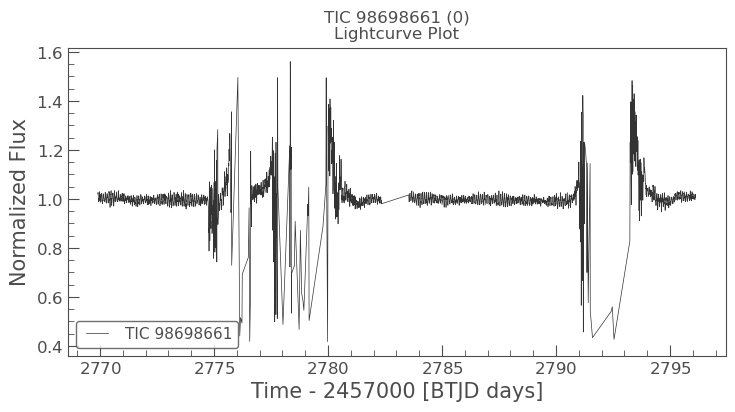

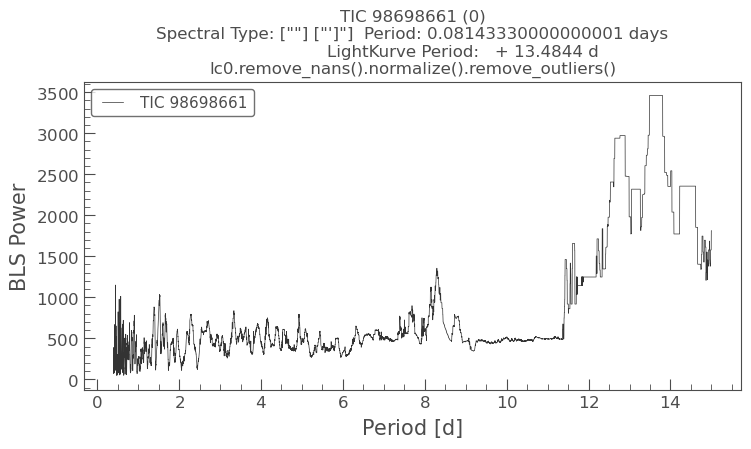

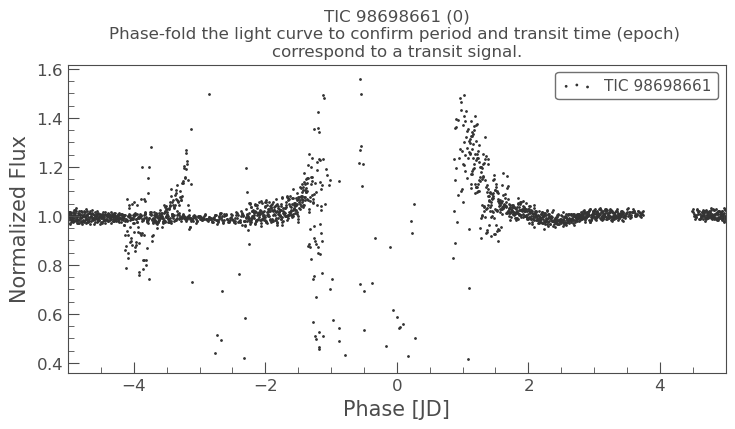

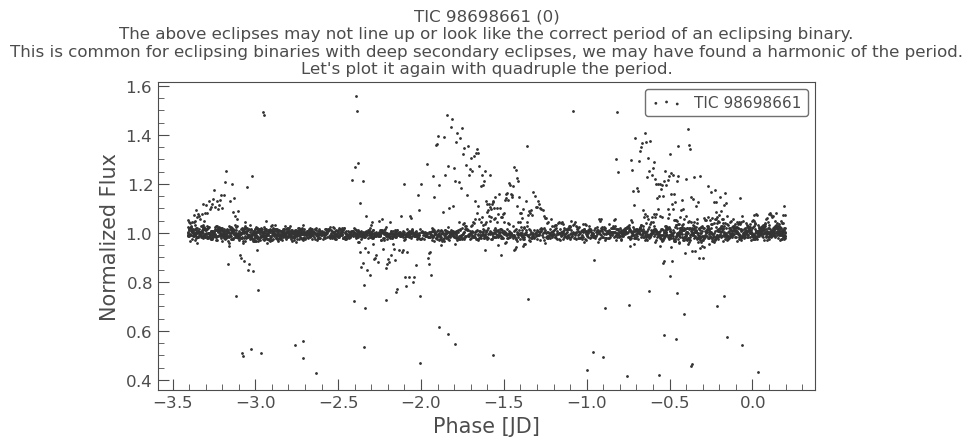

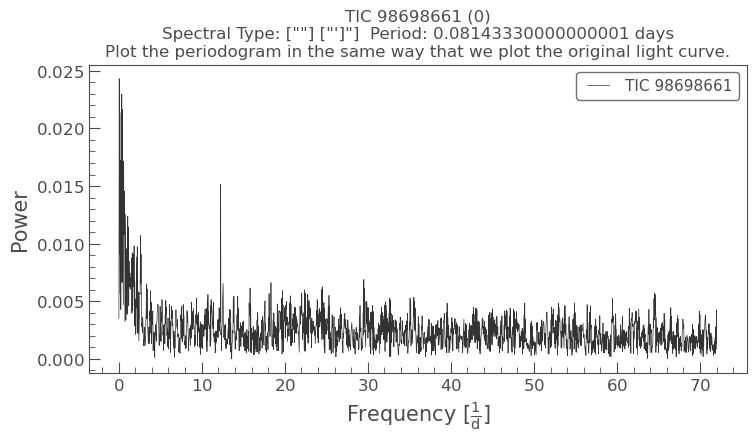

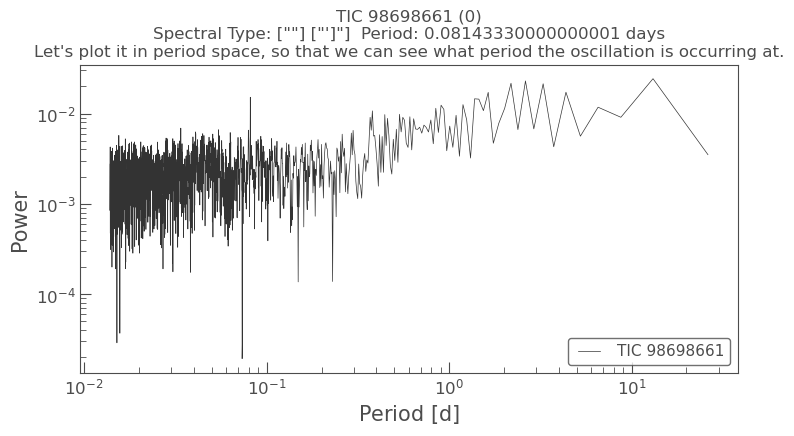

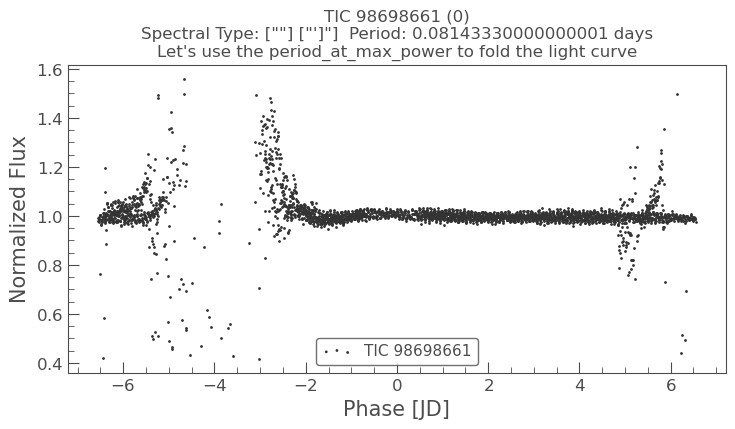

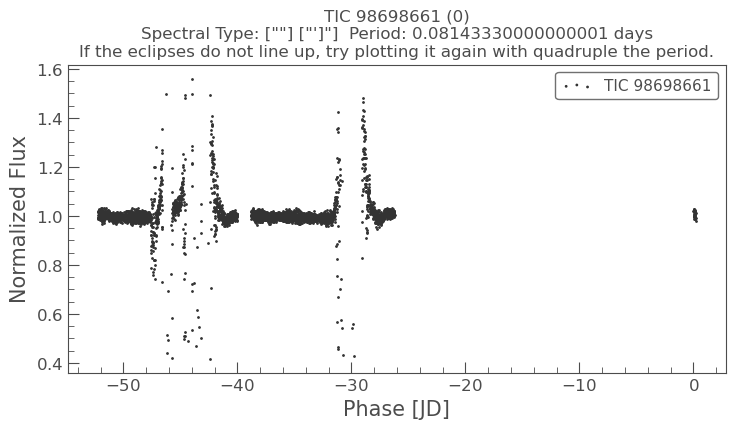

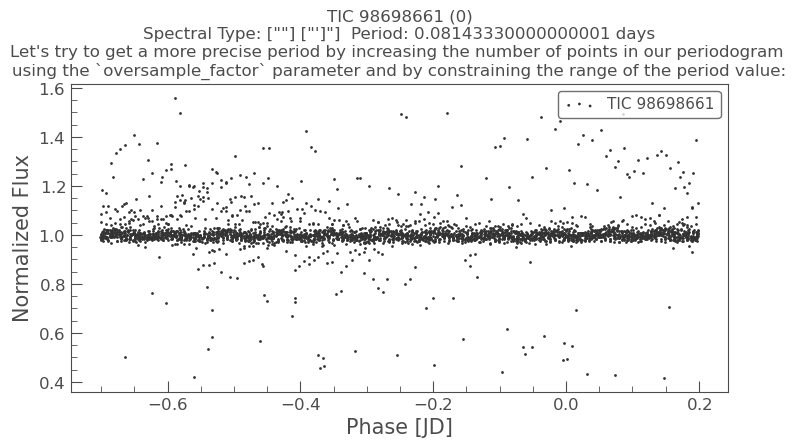


Done!


In [52]:
# Change range to fit requirement

for i in range(0, 2):
     if i <= len(search_result) -1:
          if search_result[i].author != 'K2SC':
               if search_result[i].author != 'K2SFF':
                    if search_result[i].author != 'K2VARCAT':
                         if search_result[i].author != 'DIAMANTE':
                              #if search_result[i].author != 'QLP':
                                   if search_result[i].author != 'CDIPS':
                                        #if search_result[i].author != 'TASOC':
                                             freqmin = 0.4
                                             freqmax = 15
                                             #Target_Name = '\n[Kepler-8 b]  Period: 3.52 days'
                                             #Target_Name = '\nRA: ' + str(RA) + '  ' + 'DEC: ' + str(DEC)  + '\n' + str(txt)  + '  Period: 3.90 days'
                                             Target_Name =  '\nSpectral Type: ' + str(sp_txt) + ' ' + str(txt)  + '  Period: ' + str(target_period) + ' days'
                                             #Target_Name = '\n' + "[TOI-125 d]"  + '  NASA Reported Period: 19.98  days'
                                             #PlotTarget4(target1, i, Target_Name, freqmin, freqmax)
                                             PlotTarget4B(target1, i, Target_Name, freqmin, freqmax)
                                             #PlotTarget5(target1, i, Target_Name, freqmin, freqmax)  # KeyError: "Keyword 'FRAMETIM' not found."

print("\nDone!")

In [ ]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/1803.01001.pdf') # The ASAS-SN Catalog of Variable Stars I: The Serendipitous Survey

In [ ]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/1809.07329.pdf') # The ASAS-SN Catalog of Variable Stars II: Uniform Classification of 412,000 Known Variables

In [ ]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/1901.00009.pdf') # The ASAS-SN Catalog of Variable Stars III: Variables in the Southern TESS Continuous Viewing Zone

In [ ]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/1907.10609.pdf') # The ASAS-SN Catalog of Variable Stars V: Variables in the Southern Hemisphere

In [ ]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/2006.10057.pdf') # The ASAS-SN Catalog of Variable Stars IX: The Spectroscopic Properties of Galactic Variable Stars

In [ ]:
import webbrowser

webbrowser.open('https://arxiv.org/pdf/2205.02239.pdf') # The ASAS-SN Catalog of Variable Stars X: Discovery of 116,000 New Variable Stars Using g-band Photometry